<a href="https://colab.research.google.com/github/KevinYih/BigDataDemo/blob/main/AI_week7_Loan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Step 0: Import data and read by pandas



full_data = pd.read_csv(Path("/content/loan_approval_dataset.csv"))

print(full_data.shape)

(4269, 13)


In [ ]:
# Step 1: Analyse preprocess and visualize data
full_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
full_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# Find the object columns
obj = (full_data.dtypes == 'object')
print(obj)
# Drop Loan_ID, because it is unique and no relationship with other columns
# axis = 1: drop column, axis = 0: drop row
# inplace = True: modify on original dataset
full_data.drop(['loan_id'], axis=1, inplace=True)

loan_id                      False
 no_of_dependents            False
 education                    True
 self_employed                True
 income_annum                False
 loan_amount                 False
 loan_term                   False
 cibil_score                 False
 residential_assets_value    False
 commercial_assets_value     False
 luxury_assets_value         False
 bank_asset_value            False
 loan_status                  True
dtype: bool


In [ ]:
# Analyse object data columns first
obj = (full_data.dtypes == 'object')
obj_cols = list(obj[obj].index)
print(obj_cols)

[' education', ' self_employed', ' loan_status']


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

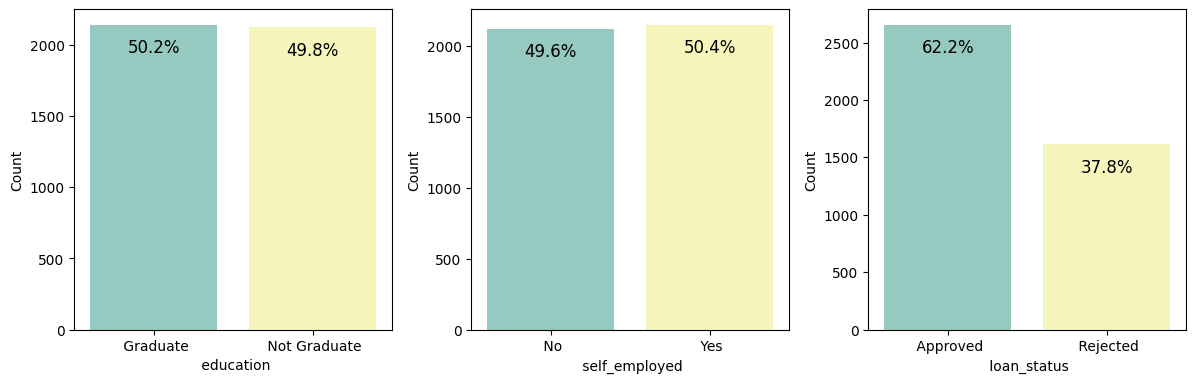

In [ ]:
# Graphically display the values ​​of each object type column to
# visually compare the proportional relationship of different
# values ​​of each column

plt.figure(figsize=(20, 30))
idx = 1
for col in obj_cols:
    plt.subplot(8, 5, idx)

    # Create first y axis to show count
    ax1 = sns.countplot(x=col, data=full_data, palette='Set3', hue=col, legend=False)

    # Calculate total items for each column
    total = len(full_data[col])

    # upd by kingsley in 10/01/2024: Simplified processing
    # Create a second axis
    #ax2 = ax1.twinx()
    # Set axis2 value from 0 to 1
    #ax2.set_ylim(0, 1)

    # ax1.patches: Get every bar object
    for p in ax1.patches:
        # Get height for each bar
        height = p.get_height()
        # Calculate percentage, :.1f means keep 1 decimal place
        percentage = f'{100 * height / total:.1f}%'
        #Annotate pecentage on each bar
        #ha: horizontal align, va: vertical align,
        ax1.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='baseline', fontsize=12, color='black', xytext=(0, -20),
                     textcoords='offset points')

    # Set y labels
    ax1.set_ylabel('Count')
    idx += 1
    #ax2.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [ ]:
# Remove spaces in front and at the end of the column names
full_data.columns = full_data.columns.str.strip()
print(full_data['loan_status'].unique())

[' Approved' ' Rejected']


In [ ]:
from sklearn import preprocessing

# Handle missing values
# For object (categorical) columns, fill missing values with the mode (most frequent value)
for col in full_data.select_dtypes(include='object').columns:
    full_data[col].fillna(full_data[col].mode()[0], inplace=True)

# For numerical columns, fill missing values with the median
for col in full_data.select_dtypes(include=['float64', 'int64']).columns:
    full_data[col].fillna(full_data[col].median(), inplace=True)

# Check if all missing values are handled
print(full_data.isnull().sum())

# Manually map 'loan_status' column: 'approved' -> 1, 'rejected' -> 0
# Replace 'approved' with 1 and 'rejected' with 0
full_data['loan_status'] = full_data['loan_status'].str.strip()
full_data['loan_status'] = full_data['loan_status'].replace({'Approved': 1, 'Rejected': 0})

# Define a LabelEncoder to convert other categorical variables to numeric values
label_encoder = preprocessing.LabelEncoder()

# Identify other categorical columns (excluding 'loan_status')
obj_col = full_data.select_dtypes(include='object').columns.tolist()

# Ensure 'loan_status' is not in obj_col list
if 'loan_status' in obj_col:
    obj_col.remove('loan_status')

# Use LabelEncoder to transform other categorical data into numerical values
for col in obj_col:
    full_data[col] = label_encoder.fit_transform(full_data[col])

# Check if there are any remaining object type columns
print(full_data.dtypes)

# Confirm that no missing values remain
print(full_data.isnull().sum())




no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64
no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score              

<ipython-input-26-300c34bda1e5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data[col].fillna(full_data[col].mode()[0], inplace=True)
<ipython-input-26-300c34bda1e5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
print(full_data.info())

print(full_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB
None
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          

In [ ]:

# Analyse Loan_Status
# Count different values
full_data['loan_status'].value_counts()
# View the proportion of each value
full_data['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
1,0.62216
0,0.37784


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


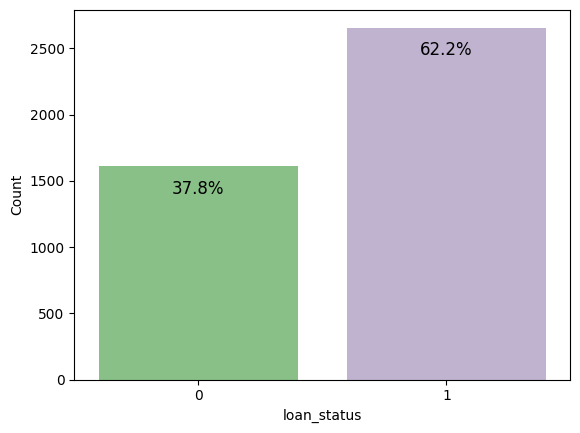

In [ ]:
# Visualize the ratio of two values: About 62% people got loan approved
# upd by Kingsley in 10/01/2024 : draw the countplot
#sns.countplot(x='loan_status', data=full_data, palette='Accent', hue="loan_status", legend=False)

# draw countplot
ax = sns.countplot(x='loan_status', data=full_data, palette='Accent',
                   hue='loan_status', dodge=False, legend=False)
# Calculate the total of each column
total = len(full_data['loan_status'])
# Display percentage above each bar
for p in ax.patches:
    height = p.get_height()
    # Calculating Percentages
    percentage = f'{100 * height / total:.1f}%'
    # Mark the percentage at the top of the column
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black',
                xytext=(0, -20),textcoords='offset points')
# Set the Y-axis label
ax.set_ylabel('Count')
plt.show()




<Axes: >

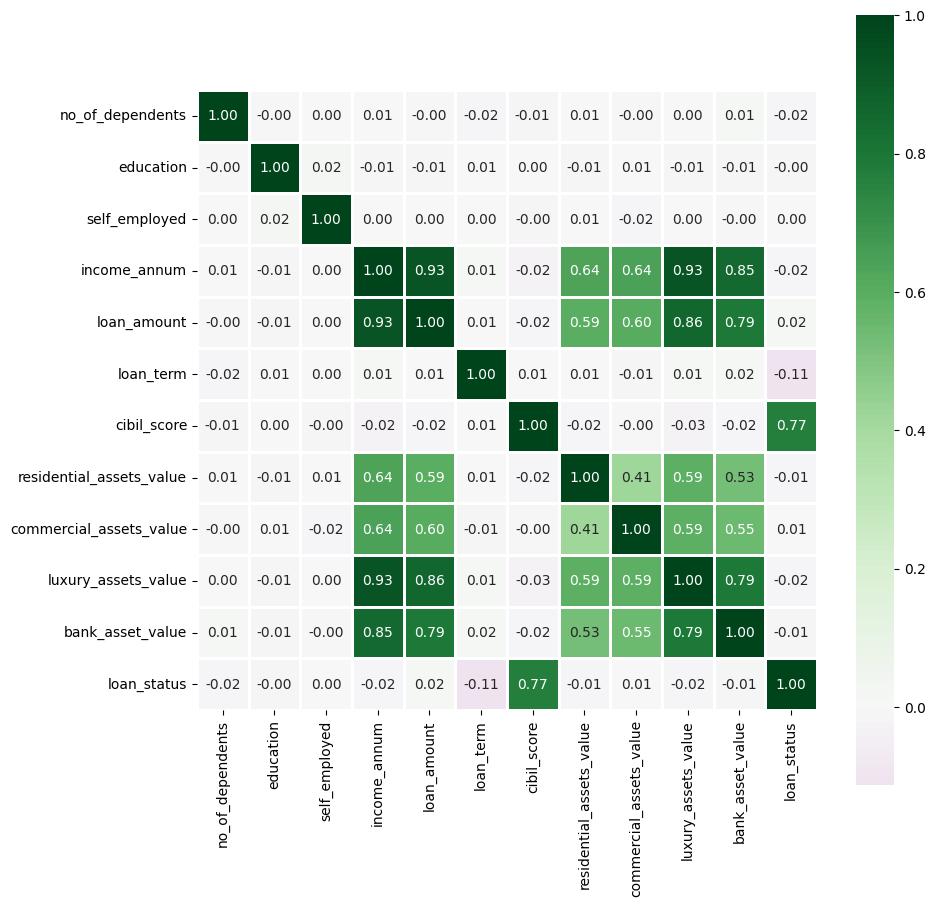

In [ ]:
# Create a figure for heatmap
plt.figure(figsize=(10, 10))
# Convert data to correlation matrix
matrix = full_data.corr()
# print(matrix)
# print(plt.colormaps())
# Create a heatmap(data matrix, color map, display number, set as square for every node,
# decimal remain 2 position, line between nodes, set center of the matrix is zero)
sns.heatmap(matrix, cmap='PRGn', annot=True, square=True, fmt='.2f', linewidths=1, center=0)


### Summary from the heatmap:

- **Cibil Score**: Strong positive correlation (0.770518) with Loan_Status. Applicants with higher credit scores are significantly more likely to be approved.
  
- **Loan Term**: Weak negative correlation (-0.113036) with Loan_Status. Longer loan terms slightly reduce the chances of approval.

- **Income Annum**: Very weak negative correlation (-0.015189) with Loan_Status. Applicant income has minimal impact on loan approval.

- **Loan Amount**: Weak positive correlation (0.016150) with Loan_Status. Loan amount has a minimal but positive effect on approval chances.

- **Luxury Assets Value**: Weak negative correlation (-0.015465) with Loan_Status. Slightly decreases chances of approval.

- **Residential Assets Value**: Very weak negative correlation (-0.014367) with Loan_Status. Minimal influence on approval chances.

- **Commercial Assets Value**: Very weak positive correlation (0.008246) with Loan_Status. Almost no impact on loan approval.

- **Self-Employed**: No significant correlation (0.000345) with Loan_Status. Being self-employed has negligible effect on loan approval.

- **Loan Amount & Income Annum**: Strong positive correlation (0.927470). Higher income leads to larger loan amounts.

### Summary:
**Cibil score** is the most important factor influencing loan approval. **Loan term** has a minor negative impact, while income and assets (both residential and luxury) have little influence on loan status. **Loan amount** is closely related to income, but has minimal direct impact on loan approval.

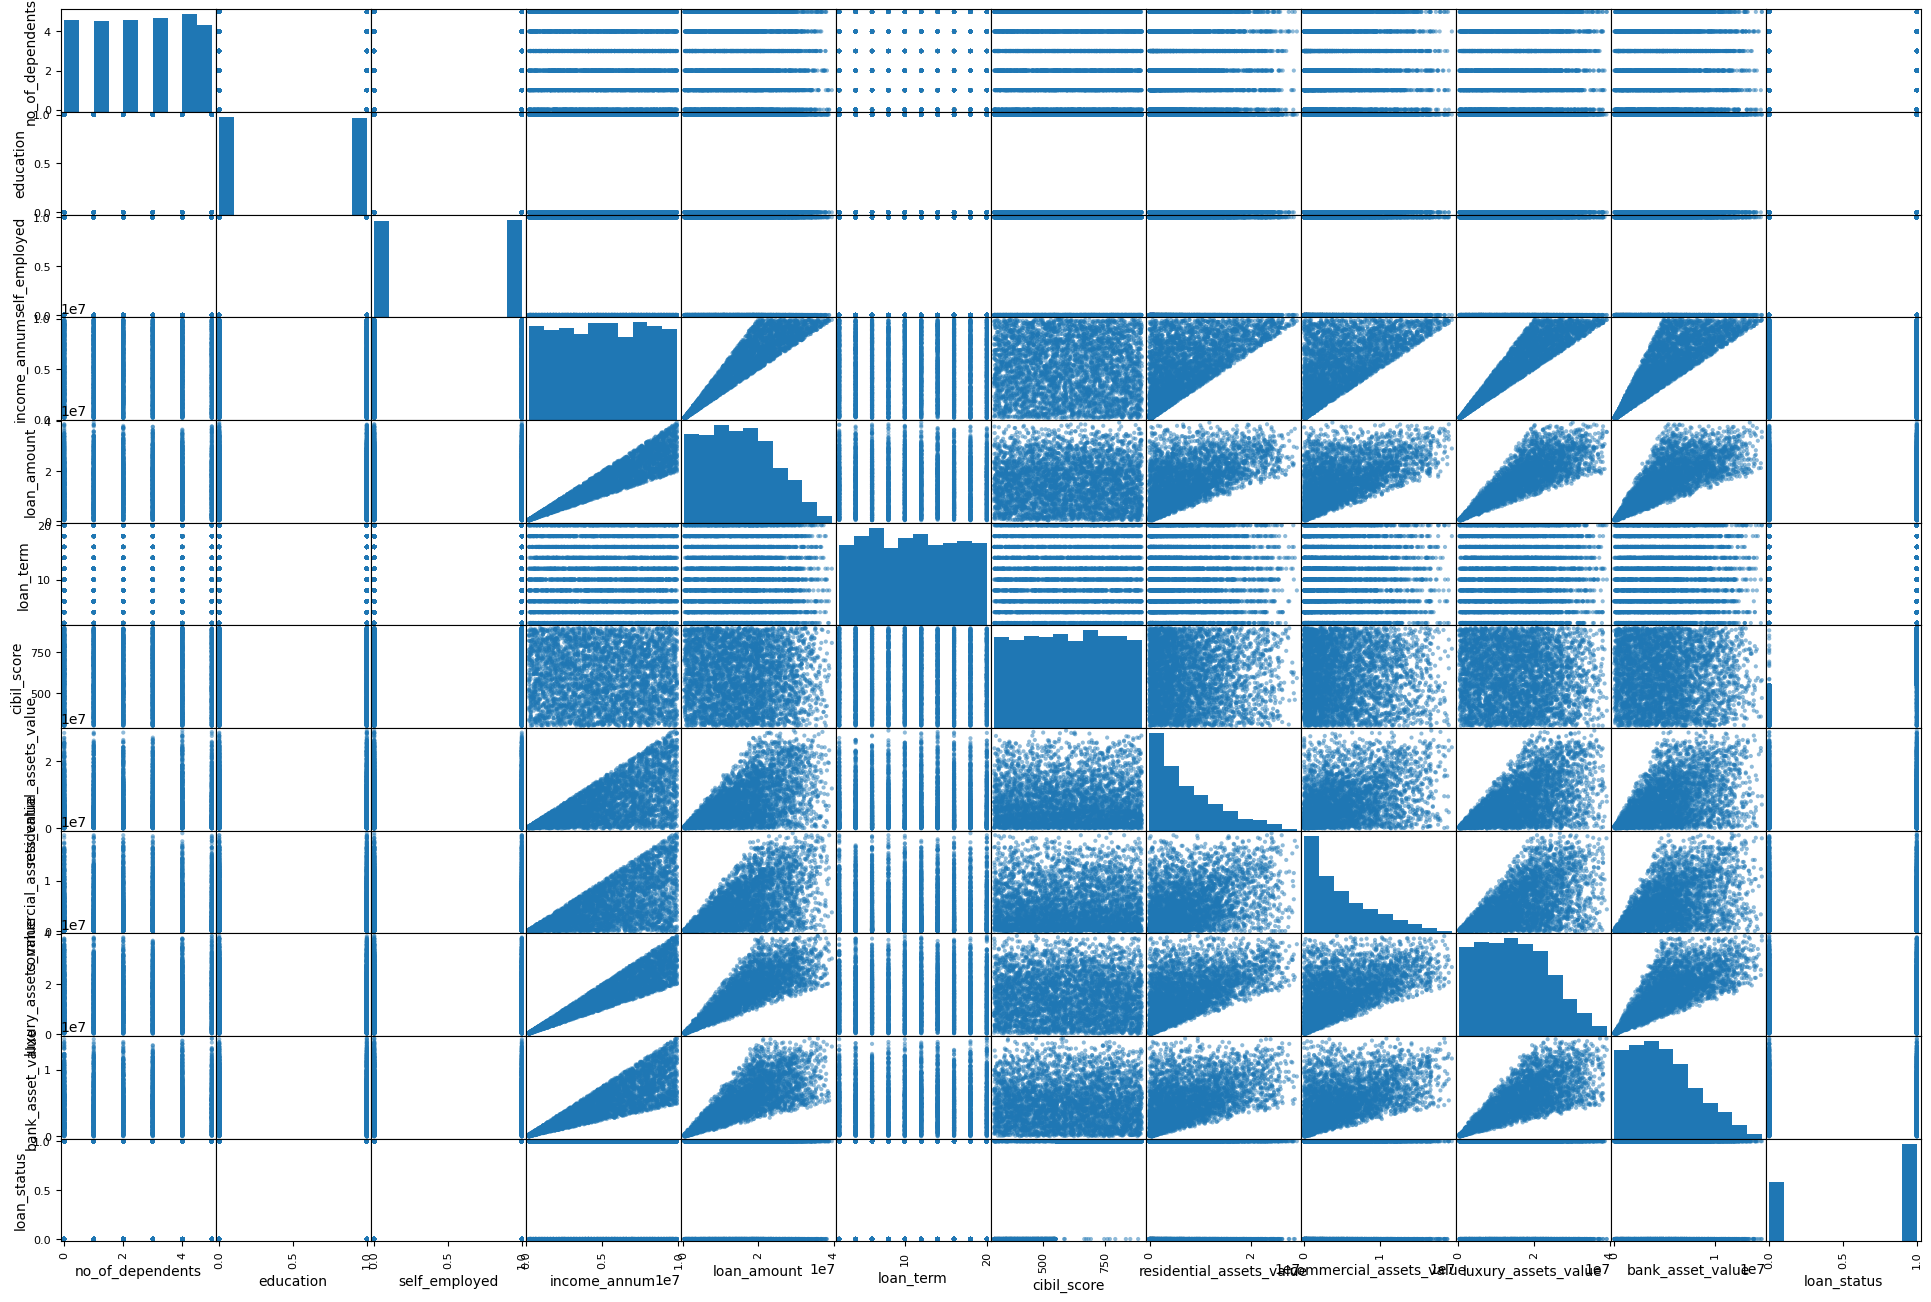

In [ ]:
# using pandas scatter_matrix function to check specific attributes' corr.
from pandas.plotting import scatter_matrix
attributes = ["no_of_dependents","education","self_employed","income_annum","loan_amount","loan_term",
              "cibil_score","residential_assets_value","commercial_assets_value","luxury_assets_value",
              "bank_asset_value","loan_status"]
scatter_matrix(full_data[attributes],figsize=(24,16))
plt.show()

According to the output diagram, the attribute groups with obvious linear relationships are as follows:

1. "income_annum" - "loan_amount"
2. "income_annum" - "luxury_assets_value"
3. "income_annum" - "bank_asset_value"
4. "loan_amount" - "luxury_assets_value"
5. "loan_amount" - "bank_asset_value"

Therefore, there is the following machine learning idea: predict the loan amount based on the income and asset situation of the customer/borrower. (From the bank's perspective, this will be beneficial for risk management.)

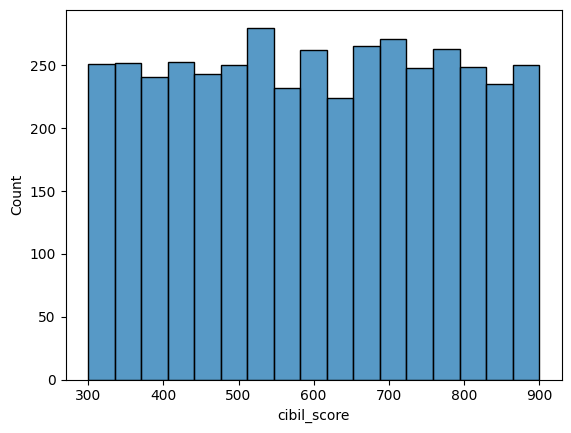

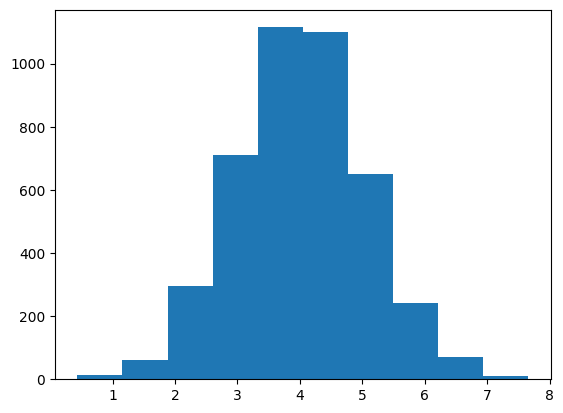

In [ ]:
# Handling abnormal data - cibil_score
# Create a new figure for the plots.
plt.figure()

# First subplot: Histogram of 'cibil_score'
# Create the first subplot (1 row, 2 columns, first plot).
plt.subplot()
# Create a histogram to show the distribution of 'cibil_score'.
sns.histplot(full_data['cibil_score'])

plt.show()

import math
import matplotlib.pyplot as plt

# Define the Box-Muller transformation function
def box_muller(original_data):
    variance = 1.0  # Variance of the normal distribution
    mean = 4.0  # Mean of the normal distribution
    std_dev = math.sqrt(variance)  # Calculate the standard deviation

    # Generate standard normal random numbers with the same length as original_data
    random_numbers = np.random.randn(len(original_data))

    # Apply the Box-Muller transformation to convert uniform distribution to normal distribution
    transformed_data = mean + std_dev * np.cos(2 * math.pi * original_data) * random_numbers

    # Return the transformed data
    return transformed_data

full_data['cibil_score_transformed'] = box_muller(full_data['cibil_score'])


plt.hist(full_data['cibil_score_transformed'])
plt.show()





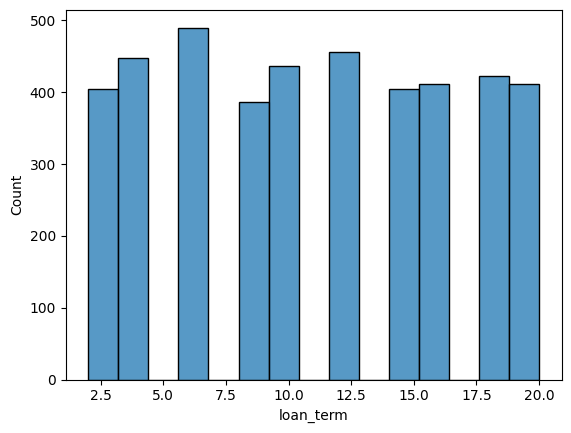

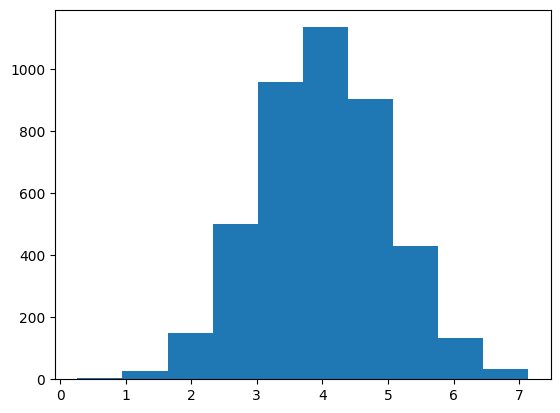

In [ ]:
# Handling abnormal data - loan_term
# Create a new figure for the plots.
plt.figure()

# First subplot: Histogram of 'loan_term'
# Create the first subplot (1 row, 2 columns, first plot).
plt.subplot()
# Create a histogram to show the distribution of 'loan_term'.
sns.histplot(full_data['loan_term'])

plt.show()

full_data['loan_term_transformed'] = box_muller(full_data['loan_term'])


plt.hist(full_data['loan_term_transformed'])
plt.show()


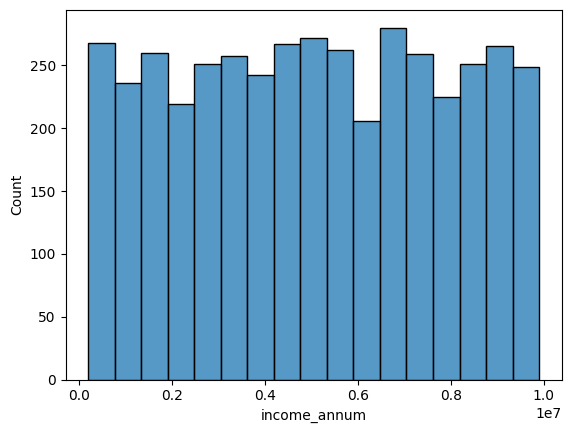

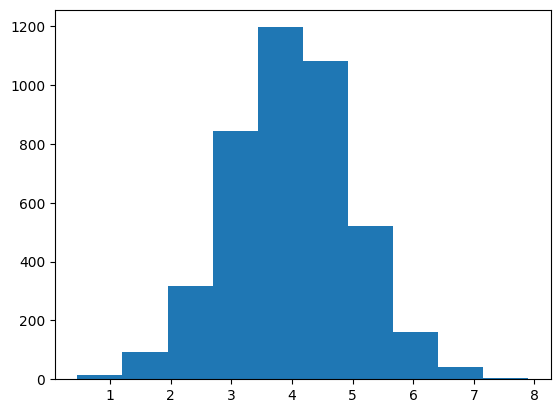

In [ ]:
# Handling abnormal data - income_annum
# Create a new figure for the plots.
plt.figure()

# First subplot: Histogram of 'income_annum'
# Create the first subplot (1 row, 2 columns, first plot).
plt.subplot()
# Create a histogram to show the distribution of 'income_annum'.
sns.histplot(full_data['income_annum'])

plt.show()


full_data['income_annum_transformed'] = box_muller(full_data['income_annum'])


plt.hist(full_data['income_annum_transformed'])
plt.show()


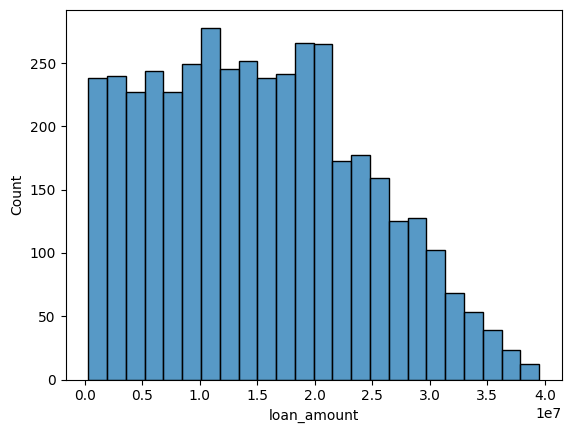

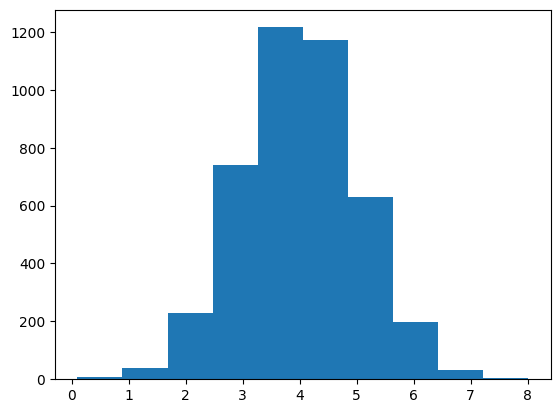

In [ ]:
# Handling abnormal data - loan_amount
# Create a new figure for the plots.
plt.figure()

# First subplot: Histogram of 'loan_amount'
# Create the first subplot (1 row, 2 columns, first plot).
plt.subplot()
# Create a histogram to show the distribution of 'loan_amount'.
sns.histplot(full_data['loan_amount'])

plt.show()

full_data['loan_amount_transformed'] = box_muller(full_data['loan_amount'])


plt.hist(full_data['loan_amount_transformed'])
plt.show()

In [ ]:
full_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_score_transformed,loan_term_transformed,income_annum_transformed,loan_amount_transformed
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.038738,3.495947,3.325907,3.423688
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.589354,2.884765,4.763996,4.129761
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,2.491998,3.428668,4.849590,3.975180
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.306130,4.396688,3.793018,3.297941
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,5.572854,3.388977,2.657650,3.570213


In [ ]:
# Algorithms that require normally distributed data, such as linear regression, logistic regression, and SVM, need to use certain features that have been normalized (transformed)
# and keep other original features untransformed.
# Algorithms that do not require normally distributed data, such as decision trees and random forests, should use all original data.

original_columns = ['no_of_dependents', 'education', 'self_employed', 'income_annum',
                    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
                    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
                    'loan_status']


transformed_columns = ['no_of_dependents', 'education', 'self_employed',
                       'income_annum_transformed', 'loan_amount_transformed',
                       'loan_term_transformed', 'cibil_score_transformed',
                       'residential_assets_value', 'commercial_assets_value',
                       'luxury_assets_value', 'bank_asset_value', 'loan_status']


transformed_data = full_data[transformed_columns]


original_data = full_data[original_columns]



In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split

x_origin = original_data.drop(['loan_status'], axis=1)
y_origin = original_data['loan_status']

x_transformed = transformed_data.drop(['loan_status'], axis=1)
y_transformed = transformed_data['loan_status']


In [ ]:
x_origin.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [ ]:
y_origin.head()

,loan_status
0,1
1,0
2,0
3,0
4,0


In [ ]:
x_transformed.head()

,no_of_dependents,education,self_employed,income_annum_transformed,loan_amount_transformed,loan_term_transformed,cibil_score_transformed,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,3.325907,3.423688,3.495947,3.038738,2400000,17600000,22700000,8000000
1,0,1,1,4.763996,4.129761,2.884765,2.589354,2700000,2200000,8800000,3300000
2,3,0,0,4.849590,3.975180,3.428668,2.491998,7100000,4500000,33300000,12800000
3,3,0,0,3.793018,3.297941,4.396688,3.306130,18200000,3300000,23300000,7900000
4,5,1,1,2.657650,3.570213,3.388977,5.572854,12400000,8200000,29400000,5000000


In [ ]:
y_transformed.head()

,loan_status
0,1
1,0
2,0
3,0
4,0


In [ ]:
# Split both origin and transformed data to train and test

x_origin_train, x_origin_test, y_origin_train, y_origin_test =
train_test_split(x_origin, y_origin, test_size=0.3, random_state=1)

x_origin_train.shape, x_origin_test.shape, y_origin_train.shape, y_origin_test.shape

((2988, 11), (1281, 11), (2988,), (1281,))

In [ ]:
x_transformed_train, x_transformed_test, y_transformed_train, y_transformed_test =
train_test_split(x_origin, y_origin, test_size=0.3, random_state=1)

x_transformed_train.shape, x_transformed_test.shape, y_transformed_train.shape, y_transformed_test.shape

((2988, 11), (1281, 11), (2988,), (1281,))

### **Models that need normalized data**:
1. **Linear Regression**
2. **Support Vector Machine (SVM)**
3. **Logistic Regression**

### **Models that don't need normalized data**:
1. **Decision Tree**
2. **K-Nearest Neighbors (KNN)**
3. **Random Forest**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, classification_report, confusion_matrix

# Instantiate three models: LinearRegression, LogisticRegression, and SVC
linear = LinearRegression(n_jobs=-1)  # Linear Regression (used for regression problems, not classification)
logistic = LogisticRegression(max_iter=200, n_jobs=-1)  # Logistic Regression (used for binary classification)
svc = SVC()  # Support Vector Classifier (used for classification tasks)

# Loop over logistic and SVC models (both are classifiers) to train and evaluate them
for model in (logistic, svc):
    model.fit(x_transformed_train, y_transformed_train)  # Train the model using normalized training data
    predict = model.predict(x_transformed_test)  # Predict using normalized test data
    # Calculate and print accuracy score for each classification model
    print("Accuracy Score of", model.__class__.__name__, '=', accuracy_score(y_transformed_test, predict))
    cross_score = cross_val_score(model, x_transformed_train, y_transformed_train, cv=5)
    print("Cross Validate Score of", model.__class__.__name__, '=', cross_score.mean())

# Evaluate Linear Regression model (regression task) separately using mean squared error
linear.fit(x_transformed_train, y_transformed_train)  # Train the linear regression model using normalized data
predictions_linear = linear.predict(x_transformed_test)  # Predict target values for the test data
mse = mean_squared_error(y_transformed_test, predictions_linear)  # Calculate mean squared error
print("Mean Squared Error for Linear Regression =", mse)  # Print the MSE result
r2score = r2_score(y_transformed_test, predictions_linear)
print("R2 score for Linear Regression =", r2score)  # Print the MSE result

Accuracy Score of LogisticRegression = 0.7845433255269321
Cross Validate Score of LogisticRegression = 0.79719444491129
Accuracy Score of SVC = 0.6229508196721312
Cross Validate Score of SVC = 0.6218203615625508
Mean Squared Error for Linear Regression = 0.0937532117287283
R2 score for Linear Regression = 0.6008516008665927


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate three models: DecisionTree, KNN, and RandomForest
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Loop over the three models to train and evaluate them
for model in (decision_tree, knn, random_forest):
    # Train the model using training data
    model.fit(x_origin_train, y_origin_train)

    # Predict using test data
    predict = model.predict(x_origin_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_origin_test, predict)
    print(f"Accuracy Score of {model.__class__.__name__} =", accuracy)

    # Perform cross-validation
    cross_score = cross_val_score(model, x_origin_train, y_origin_train, cv=5)
    print(f"Cross Validate Score of {model.__class__.__name__} =", cross_score.mean())

    # Output classification report
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_origin_test, predict))

    # Output confusion matrix
    print(f"Confusion Matrix for {model.__class__.__name__}:")
    print(confusion_matrix(y_origin_test, predict))

Accuracy Score of DecisionTreeClassifier = 0.9797033567525371
Cross Validate Score of DecisionTreeClassifier = 0.9695456098777051
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       483
           1       0.99      0.98      0.98       798

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

Confusion Matrix for DecisionTreeClassifier:
[[472  11]
 [ 15 783]]
Accuracy Score of KNeighborsClassifier = 0.5589383294301327
Cross Validate Score of KNeighborsClassifier = 0.5763001182052963
Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.38      0.27      0.32       483
           1       0.62      0.73      0.67       798

    accuracy                           0.56      1281
   macro avg       0.50      0.50

Here’s a detailed explanation of the purpose of each metric:

### 1. **`accuracy_score`**:
   - **Purpose**: This metric calculates the overall correctness of a model by dividing the number of correct predictions by the total number of predictions. It represents the ratio of correct predictions to total samples.
   - **When to Use**: Accuracy is a general metric that is helpful when classes are balanced, i.e., when there is roughly an equal number of samples for each class.

### 2. **`classification_report`**:
   - **Purpose**: This report provides a comprehensive summary of the performance of a classification algorithm. It includes several metrics, each with its distinct role:
     - **Precision**: Measures the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: *Of all the positive predictions, how many were actually positive?*
     - **Recall (Sensitivity or True Positive Rate)**: Measures the ratio of correctly predicted positive observations to all observations in the actual class. It answers: *Of all the actual positives, how many were correctly predicted?*
     - **F1-Score**: A weighted average of precision and recall, providing a balance between the two. It’s useful when there’s a trade-off between precision and recall.
   - **When to Use**: This is especially useful when the dataset is imbalanced, providing insights into how well the model is performing for each class.

### 3. **`confusion_matrix`**:
   - **Purpose**: The confusion matrix gives a detailed breakdown of actual versus predicted values. It allows for an analysis of not only how many predictions were correct but also the types of errors made (false positives and false negatives).
     - **True Positives (TP)**: Correctly classified positive instances.
     - **True Negatives (TN)**: Correctly classified negative instances.
     - **False Positives (FP)**: Incorrectly classified as positive (Type I error).
     - **False Negatives (FN)**: Incorrectly classified as negative (Type II error).
   - **When to Use**: It’s essential when you want to understand the type of errors a model is making, such as in medical diagnoses (where false negatives or false positives have different implications).

### Why These Metrics Matter:
- **Accuracy**: Gives a general idea of model correctness, but can be misleading with imbalanced data.
- **Precision**: Important in cases where minimizing false positives is crucial (e.g., spam detection).
- **Recall**: Important in scenarios where missing positive cases (false negatives) is costly, such as detecting fraud or diseases.
- **F1-Score**: Useful when you need to balance precision and recall, particularly with imbalanced datasets.
- **Confusion Matrix**: Helps identify the type of errors and the performance on specific classes, allowing deeper insight into model performance.

Each of these metrics helps you understand different aspects of your model's performance and provides a comprehensive view of how well the classifier is performing, particularly in handling different types of errors.